In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('seaborn')
import math
import seaborn as sns
import scipy.stats as stats
import pandas_profiling

In [2]:
train_raw = pd.DataFrame(pd.read_csv("../data/train.csv"))

In [3]:
train_raw.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


### CLEANING DATA

**1. Look at columns of data**

In [4]:
print("There are {} columns. They are:\n" .format(len(train_raw.columns)))
train_raw.columns

There are 12 columns. They are:



Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

**2. Remove duplicate observations**

In [5]:
#train = train_raw.drop_duplicates()

In [6]:
train_raw.shape

(10506, 12)

**2. Find columns with missing/null values**

In [7]:
# Function to find missing/ null values
def Get_zero_vals(df):
    for zero_values in df:
        df_zero_values = (df[zero_values] == 0).sum()
        if df_zero_values != 0:        
            print(f'{zero_values}: {df_zero_values} Zeros')
            
Get_zero_vals(train_raw)

WnvPresent: 9955 Zeros


In [8]:
def Get_null_vals(df):
    for null_values in df:
        df_null_values = df[null_values].isnull().sum()
        if df_null_values != 0:
            print(f'{null_values}: {df_null_values} null values')
            
Get_null_vals(train_raw)

**3. Deal with missing/ null values**

Strangely there are no null values, so I dont have to worry about dealing with it

As for the zero values, they are only presnet in the column 'WnvPresent' where 0 relates to the absence of west nile virus

**4. Categorise variables** 
- Data types 
- Indicators

In [9]:
# Function to view data type and value counts for each column 
def dtype_valuecounts(df):
    for i in df.columns:
        print(i,":", df[i].dtypes,"\n", "Value_Counts:", len(df[i].value_counts()),'\n')

In [10]:
train_raw.shape[0]/10

1050.6

In [11]:
dtype_valuecounts(train_raw)

Date : object 
 Value_Counts: 95 

Address : object 
 Value_Counts: 138 

Species : object 
 Value_Counts: 7 

Block : int64 
 Value_Counts: 64 

Street : object 
 Value_Counts: 128 

Trap : object 
 Value_Counts: 136 

AddressNumberAndStreet : object 
 Value_Counts: 138 

Latitude : float64 
 Value_Counts: 138 

Longitude : float64 
 Value_Counts: 138 

AddressAccuracy : int64 
 Value_Counts: 4 

NumMosquitos : int64 
 Value_Counts: 50 

WnvPresent : int64 
 Value_Counts: 2 



There are 9693 observations in this train dataset.

Comparing the number of observations and the value counts of each column, we can deduce that all the features of this dataset can be categorical as even if certain variables are of a float datatype, they are not continuous. 
- Eg. There are 138 different Latitudes and Longitudes even though they are float 

**5. Identify outliers**
- box-plot - for both numerical and nominal data
- scatter plot - for numerical data 
- histogram - for nominal and ordinal data

In [12]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/4))
    a = int(np.ceil(len(list_of_columns)/4))*8.5
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(30,a)) 
    ax = ax.ravel()     
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize=30)
        ax[i].set_ylabel('Frequency')
        ax[i].axhline(y=dataframe.shape[0]*0.7, color='r')

In [13]:
# subplot_histograms(train_raw, train_raw.columns, train_raw.columns)

**6. Pandas Profiling**

In [14]:
# pandas_profiling.ProfileReport(train_raw)

- There seems to be a significant correlation between latitude/ longitude and AddressAcuracy
- Another correlation can be seen in NumMosquitos and WnvPresent

- Converting 'Date' column to date-time

In [15]:
train_raw['Date'] = pd.to_datetime(train_raw['Date'])

### EDA

In [16]:
train_raw.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


- Groupby/ find unique value counts for 'Address'

In [17]:
train_raw['Address'].value_counts()

ORD Terminal 5, O'Hare International Airport, Chicago, IL 60666, USA         750
South Doty Avenue, Chicago, IL, USA                                          542
South Stony Island Avenue, Chicago, IL, USA                                  314
4100 North Oak Park Avenue, Chicago, IL 60634, USA                           185
4200 West 127th Street, Alsip, IL 60803, USA                                 183
                                                                            ... 
3400 West 77th Street, Chicago, IL 60652, USA                                  7
9600 South Longwood Drive, Chicago, IL 60643, USA                              5
5500 South Doctor Martin Luther King Junior Drive, Chicago, IL 60637, USA      5
2900 West 85th Street, Chicago, IL 60652, USA                                  3
2100 South Hamlin Avenue, Chicago, IL 60623, USA                               2
Name: Address, Length: 138, dtype: int64

- Groupby/ find unique value counts for 'AddressNumberAndStreet'

In [18]:
train_raw['AddressNumberAndStreet'].value_counts()

1000  W OHARE AIRPORT, Chicago, IL                  750
1200  S DOTY AVE, Chicago, IL                       542
1000  S STONY ISLAND AVE, Chicago, IL               314
4100  N OAK PARK AVE, Chicago, IL                   185
4200  W 127TH PL, Chicago, IL                       183
                                                   ... 
3400  W 77TH ST, Chicago, IL                          7
9600  S LONGWOOD DR, Chicago, IL                      5
5500  S DR MARTIN LUTHER KING JR DR, Chicago, IL      5
2900  W 85TH ST, Chicago, IL                          3
2100  S HAMLIN AVE, Chicago, IL                       2
Name: AddressNumberAndStreet, Length: 138, dtype: int64

In [19]:
train_raw['AddressAccuracy'].value_counts()

8    4628
9    3980
5    1807
3      91
Name: AddressAccuracy, dtype: int64

"The first technique, “method A”, consisted in an automatic method based on a free online geocoding service accessible at http://dehaese.free.fr/Gmaps/testGeocoder.htm. The reference street network database was based on Google Maps® ; the total number of addresses stored in the database was not provided by Google®. After automatic online geocoding processing, latitude and longitude coordinates in the WGS 84 projection system were exported for each address geocoded as well as accuracy of each location ranking from 0 to 9 (0: not found, 1: country level, 2: region (state and district), **3: county**, 4: city, **5: postal code**, 6: street segment, 7: intersection of streets, **8: address**, **9: point of interest (building names, church…)**). In France, levels 2, 3 and 7 did not exist in the administrative division of territories and were therefore not applicable. For geocoded addresses with a precision lower than 6 (street segment level), the spelling of street names and municipalities were checked again manually and corrected if necessary. Revised addresses were then geocoded a second time with the same online geocoder. The database was imported into ArcGIS 10.0 (Environmental System Research Institute- ESRI-Redlands, CA, USA) to create a data layer and all coordinates were converted into Lambert 93, which is the projection system currently used in France." 
    
- link https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5324215/

The project requires us to do cost benefit analysis based on levels. We can use this Address Acuracy for the levels 

- Thus, all we need is the latitude, longitude and addressaccuracy 

In [20]:
train_raw.info()
train = train_raw
# delete address fields because location has already been translated into latitude and longitude
del train['Address']
del train['Block']
del train['Street']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null datetime64[ns]
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 985.1+ KB


- Groupby/ find unique value counts for 'Trap'

In [21]:
len(train['Trap'].value_counts())

136

There are 136 different types of Traps. Of which, 134 are normal type traps and 2 that are satellite traps

In [22]:
train['Trap'].value_counts()

T900     750
T115     542
T138     314
T002     185
T135     183
        ... 
T238       7
T094B      5
T076       5
T237       3
T040       2
Name: Trap, Length: 136, dtype: int64

In [23]:
train.columns

Index(['Date', 'Species', 'Trap', 'AddressNumberAndStreet', 'Latitude',
       'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [24]:
train.groupby('AddressAccuracy')['Trap'].count()

AddressAccuracy
3      91
5    1807
8    4628
9    3980
Name: Trap, dtype: int64

This shows the number of traps in each Level

In [25]:
train.groupby('AddressNumberAndStreet')['Trap','AddressAccuracy'].agg(['unique','count'])

Trap        \
                                                   unique count   
AddressNumberAndStreet                                            
1000  E 67TH ST, Chicago, IL                       [T073]   128   
1000  N CENTRAL PARK DR, Chicago, IL               [T030]   126   
1000  S CALIFORNIA AVE, Chicago, IL                [T088]    28   
1000  S COTTAGE GROVE, Chicago, IL                 [T102]   112   
1000  S STONY ISLAND AVE, Chicago, IL              [T138]   314   
...                                                   ...   ...   
9100  W HIGGINS RD, Chicago, IL                    [T009]    80   
9300  S DR MARTIN LUTHER KING JR DR, Chicago, IL   [T162]    21   
9600  S HOYNE AVE, Chicago, IL                     [T161]    26   
9600  S LONGWOOD DR, Chicago, IL                  [T094B]     5   
9800  S AVENUE G, Chicago, IL                      [T100]    23   

                                                 AddressAccuracy        
                                                          unique count  
AddressNumberAndStreet                                                  
1000  E 67TH ST, Chicago, IL                                 [8]   128  
1000  N CENTRAL PARK DR, Chicago, IL                         [9]   126  
1000  S CALIFORNIA AVE, Chicago, IL                          [9]    28  
1000  S COTTAGE GROVE, Chicago, IL                           [5]   112  
1000  S STONY ISLAND AVE, Chicago, IL                        [5]   314  
...                                                          ...   ...  
9100  W HIGGINS RD, Chicago, IL                              [8]    80  
9300  S DR MARTIN LUTHER KING JR DR, Chicago, IL             [8]    21  
9600  S HOYNE AVE, Chicago, IL                               [9]    26  
9600  S LONGWOOD DR, Chicago, IL                             [9]     5  
9800  S AVENUE G, Chicago, IL                                [8]    23  

[138 rows x 4 columns]

Text(0.5, 1.0, 'total number of traps per AddressAccuracy')

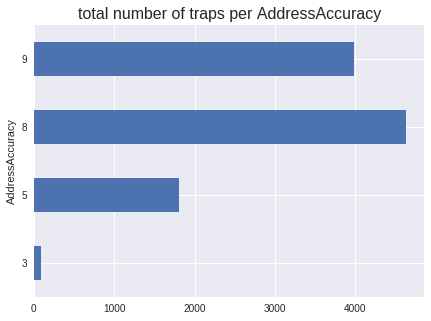

In [26]:
train.groupby('AddressAccuracy')['Trap'].count().plot(kind='barh', figsize=(7,5))
plt.title('total number of traps per AddressAccuracy', fontsize=16)

This shoows that each address has each address has a unique trap and AddressAccuray. Therefore we can colclude that each each trap is localised to an address only 

In [27]:
train[train_raw['Trap'] == 'T001']

,Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
136,2007-06-26,CULEX PIPIENS/RESTUANS,T001,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,1,0
359,2007-07-11,CULEX PIPIENS/RESTUANS,T001,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,1,0
487,2007-07-18,CULEX PIPIENS,T001,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,1,0
971,2007-08-01,CULEX PIPIENS/RESTUANS,T001,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,1,0
972,2007-08-01,CULEX PIPIENS/RESTUANS,T001,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,2,0
973,2007-08-01,CULEX PIPIENS,T001,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,1,0
1566,2007-08-07,CULEX PIPIENS/RESTUANS,T001,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,1,0
1567,2007-08-07,CULEX PIPIENS,T001,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,1,0
1895,2007-08-15,CULEX PIPIENS/RESTUANS,T001,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,5,0
1896,2007-08-15,CULEX PIPIENS,T001,"4000 N TRIPP AVE, Chicago, IL",41.953705,-87.733974,8,5,0


In [28]:
# train_pt = pd.pivot_table(train_raw, index = ['AddressNumberAndStreet','Date','Latitude','Longitude','AddressAccuracy','Station','WnvPresent','Trap'], values = 'NumMosquitos', columns=['Species'],aggfunc=np.sum)
# train_pt
# train_pt.fillna(0)

In [29]:
# check whether all species carry WNV
train.groupby('Species').agg({'WnvPresent': np.sum})

# no observations among Culex Erraticus, Salinarius, Tarsalis or Territans, but
# CDC's website suggests these can all still carry the virus
# https://www.cdc.gov/westnile/resources/pdfs/mosquitospecies1999-2012.pdf

,WnvPresent
Species,
CULEX ERRATICUS,0
CULEX PIPIENS,240
CULEX PIPIENS/RESTUANS,262
CULEX RESTUANS,49
CULEX SALINARIUS,0
CULEX TARSALIS,0
CULEX TERRITANS,0


In [30]:
# # add month and year column
train['Month'] = train['Date'].dt.month
train['Year'] = train['Date'].dt.year

In [31]:
print(train['Date'].min())
print(train['Date'].max())
train.head()

2007-05-29 00:00:00
2013-09-26 00:00:00


,Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Month,Year
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,5,2007
1,2007-05-29,CULEX RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,5,2007
2,2007-05-29,CULEX RESTUANS,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,5,2007
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,5,2007
4,2007-05-29,CULEX RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,5,2007


**Mapping indiv loactions to weather stations**

In [32]:
# function to calculate distance between 2 lat/long points
# source: http://www.johndcook.com/blog/python_longitude_latitude/
def distance_on_unit_sphere(lat1, long1, lat2, long2):

    # Convert latitude and longitude to spherical coordinates in radians
    degrees_to_radians = math.pi/180.0

    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians

    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians

    # Compute spherical distance from spherical coordinates.

    # For two locations in spherical coordinates
    # (1, theta, phi) and (1, theta', phi')
    # cosine( arc length ) =
    # sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length

    cos = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) +
    math.cos(phi1)*math.cos(phi2))
    arc = math.acos( cos )

    # Remember to multiply arc by the radius of the earth
    # in your favorite set of units to get length.
    return arc

# weather stations 1 and 2 lat/longitude
station_1_lat = 41.995
station_1_lon = -87.933
station_2_lat = 41.786
station_2_lon = -87.752

# function to calculate whether station 1 or 2 (from weather.csv) is closer
def closest_station(lat, lon):
    if (distance_on_unit_sphere(lat, lon, station_1_lat, station_1_lon) <
        distance_on_unit_sphere(lat, lon, station_2_lat, station_2_lon)):
        return 1
    else: return 2

# add station to indicate whether station 1 or 2 is closer
train['Station'] = [closest_station(a,b) for (a, b) in zip(train.Latitude, train.Longitude)]

train.Station.value_counts()

2    7208
1    3298
Name: Station, dtype: int64

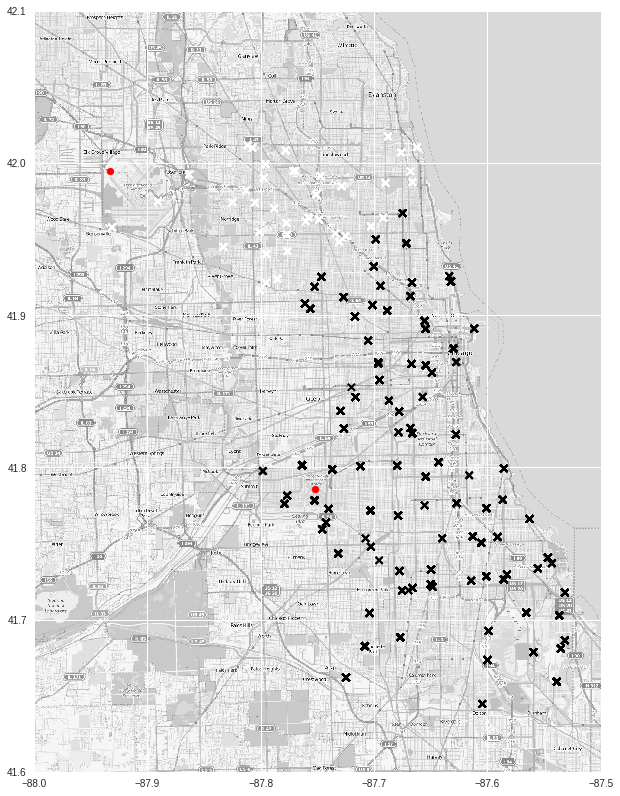

In [33]:
mapdata = np.loadtxt("../data/resources/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(12,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('Greys_r'), 
           extent=lon_lat_box, 
           aspect=aspect)

# locations = aggregated[['Longitude', 'Latitude']].drop_duplicates().values

plt.scatter(train.Longitude, train.Latitude, c = train.Station ,marker = 'x')
plt.scatter([station_1_lon, station_2_lon], [station_1_lat,station_2_lat], c = 'r')

# plt.scatter([-87.933,-87.752],[41.995,41.786], marker = 'o', c='red')
# plt.scatter(locations[:,0], locations[:,1], marker='x', c='yellow')

# Add this when copying to a script on Kaggle:
plt.savefig('../images/train_mapped_to_weather_stations.png')

In [34]:
train.head()

,Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Month,Year,Station
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,5,2007,1
1,2007-05-29,CULEX RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,5,2007,1
2,2007-05-29,CULEX RESTUANS,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,5,2007,1
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,5,2007,1
4,2007-05-29,CULEX RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,5,2007,1


### EXPORT TO CSV

In [35]:
train.to_csv('../data/train_cleaned.csv', encoding= 'utf-8', index= False)

### EDA 
**Further EDA using aggregated data**

In [36]:
# aggregate observations that are only distinct because of
# hitting the 50 mosquito cap
grouped = train.groupby(['Date', 'Species', 'Trap', 'Latitude', 'Longitude','AddressNumberAndStreet','AddressAccuracy','Month',
       'Year', 'Station'])
aggregated = pd.DataFrame(grouped.agg({'NumMosquitos': np.sum, 'WnvPresent': np.max})).reset_index()
aggregated.sort_values(by = 'NumMosquitos', ascending = False)

,Date,Species,Trap,Latitude,Longitude,AddressNumberAndStreet,AddressAccuracy,Month,Year,Station,NumMosquitos,WnvPresent
1450,2007-08-16,CULEX PIPIENS,T115,41.673408,-87.599862,"1200 S DOTY AVE, Chicago, IL",5,8,2007,2,2532,1
564,2007-07-25,CULEX PIPIENS,T115,41.673408,-87.599862,"1200 S DOTY AVE, Chicago, IL",5,7,2007,2,2356,1
1897,2007-08-28,CULEX PIPIENS,T115,41.673408,-87.599862,"1200 S DOTY AVE, Chicago, IL",5,8,2007,2,2207,1
1190,2007-08-08,CULEX PIPIENS,T138,41.726465,-87.585413,"1000 S STONY ISLAND AVE, Chicago, IL",5,8,2007,2,1658,1
2032,2007-09-05,CULEX PIPIENS,T115,41.673408,-87.599862,"1200 S DOTY AVE, Chicago, IL",5,9,2007,2,1648,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3180,2009-06-19,CULEX RESTUANS,T138,41.726465,-87.585413,"1000 S STONY ISLAND AVE, Chicago, IL",5,6,2009,2,1,0
3184,2009-06-19,CULEX RESTUANS,T151,41.916265,-87.800515,"7000 W ARMITAGE AVENUE, Chicago, IL",8,6,2009,1,1,0
3189,2009-06-19,CULEX RESTUANS,T200,41.678618,-87.559308,"1300 S TORRENCE AVE, Chicago, IL",5,6,2009,2,1,0
3190,2009-06-19,CULEX RESTUANS,T209,41.740641,-87.546587,"1300 S BRANDON, Chicago, IL",5,6,2009,2,1,0


**Species of Mosquito**

All species sampled are carriers of WNV where the presence of WNV was tested positive for Culex restuans, C. pipiens, and C.pipiens/restuans. In addition, these 3 categories made up more than 96% of the sample of the species sampled.

In [37]:
# check if mosquito vars should be categorical
aggregated.Species.value_counts()

CULEX PIPIENS/RESTUANS    3826
CULEX RESTUANS            2393
CULEX PIPIENS             1950
CULEX TERRITANS            216
CULEX SALINARIUS            83
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

Text(0.5, 1.0, 'total number of samples collected for each species')

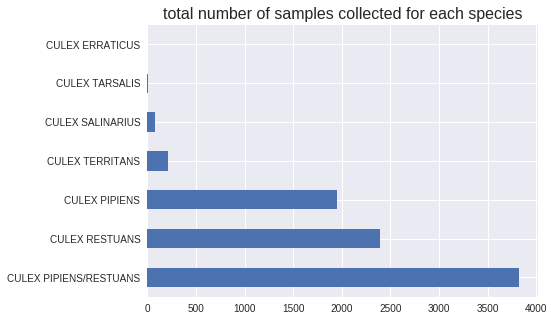

In [38]:
aggregated['Species'].value_counts().plot(kind='barh', figsize=(7,5))
plt.title('total number of samples collected for each species', fontsize=16)

                        NumMosquitos  WnvPresent
Species                                         
CULEX ERRATICUS                    7           0
CULEX PIPIENS                  44671         184
CULEX PIPIENS/RESTUANS         66268         225
CULEX RESTUANS                 23431          48
CULEX SALINARIUS                 145           0
CULEX TARSALIS                     7           0
CULEX TERRITANS                  510           0


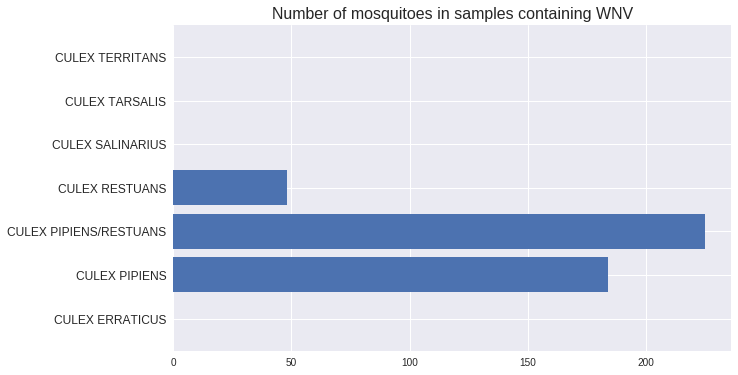

In [39]:
mos_wnv = aggregated[['Species', 'NumMosquitos', 'WnvPresent']].groupby(by='Species').sum()
print(mos_wnv)
mos_wnv.reset_index(inplace=True)
plt.figure(figsize=(10,6))
plt.barh(mos_wnv['Species'], mos_wnv['WnvPresent'])
plt.title('Number of mosquitoes in samples containing WNV', fontsize=16)
plt.yticks(fontsize=12)
plt.show()

T900     154
T002     147
T135     147
T115     143
T151     143
        ... 
T078       6
T094B      5
T076       5
T237       3
T040       2
Name: Trap, Length: 136, dtype: int64


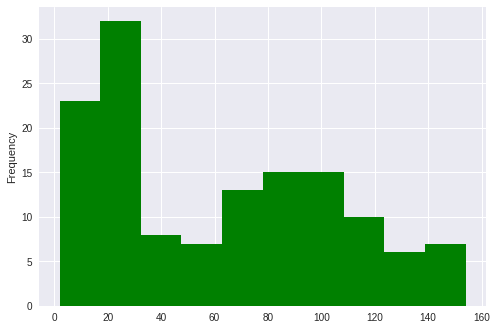

In [40]:
print(aggregated['Trap'].value_counts())
aggregated['Trap'].value_counts().plot(kind='hist', color= 'green')
# plt.tight_layout()

In [41]:
aggregated[aggregated.Trap=='T900'].head()

,Date,Species,Trap,Latitude,Longitude,AddressNumberAndStreet,AddressAccuracy,Month,Year,Station,NumMosquitos,WnvPresent
2830,2009-05-28,CULEX RESTUANS,T900,41.974689,-87.890615,"1000 W OHARE AIRPORT, Chicago, IL",9,5,2009,1,34,0
2921,2009-06-03,CULEX PIPIENS/RESTUANS,T900,41.974689,-87.890615,"1000 W OHARE AIRPORT, Chicago, IL",9,6,2009,1,254,0
2923,2009-06-03,CULEX RESTUANS,T900,41.974689,-87.890615,"1000 W OHARE AIRPORT, Chicago, IL",9,6,2009,1,80,0
2964,2009-06-05,CULEX PIPIENS/RESTUANS,T900,41.974689,-87.890615,"1000 W OHARE AIRPORT, Chicago, IL",9,6,2009,1,10,0
2998,2009-06-05,CULEX RESTUANS,T900,41.974689,-87.890615,"1000 W OHARE AIRPORT, Chicago, IL",9,6,2009,1,2,0


There are 136 traps around the city of Chicago and T900 (at O'Hare airport) is sampled the most which is literally where Station 1 is.

In [42]:
# look at distribution of data
aggregated.describe()

,Latitude,Longitude,AddressAccuracy,Month,Year,Station,NumMosquitos,WnvPresent
count,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000
mean,41.844618,-87.694788,7.941239,7.700531,2009.713156,1.709381,15.933805,0.053923
std,0.106609,0.084063,1.321681,1.108677,2.331751,0.454075,75.084707,0.225880
min,41.644612,-87.930995,3.000000,5.000000,2007.000000,1.000000,1.000000,0.000000
25%,41.750498,-87.752329,8.000000,7.000000,2007.000000,1.000000,2.000000,0.000000
50%,41.857402,-87.694991,8.000000,8.000000,2009.000000,2.000000,4.000000,0.000000
75%,41.944869,-87.642984,9.000000,9.000000,2011.000000,2.000000,11.000000,0.000000
max,42.017430,-87.531635,9.000000,10.000000,2013.000000,2.000000,2532.000000,1.000000


Text(0.5, 1.0, 'Plot of incidence of cases over time')

<Figure size 7200x3600 with 0 Axes>

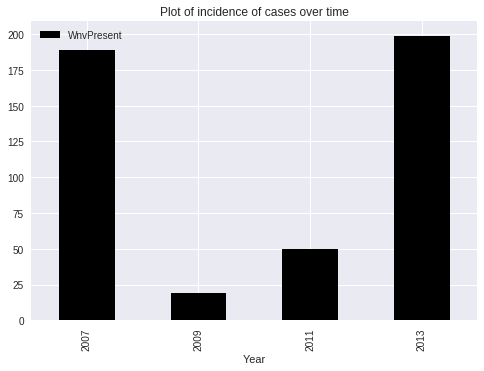

In [43]:
# look at incidence of cases over time
plt.figure(figsize=(100,50))
aggregated[['WnvPresent']].groupby(aggregated['Year']).sum().plot(kind ='bar',color = 'black')
plt.title('Plot of incidence of cases over time')

In [44]:
seasonality = aggregated[['Date','WnvPresent','NumMosquitos']]
seasonality.set_index('Date')

,WnvPresent,NumMosquitos
Date,,
2007-05-29,0,1
2007-05-29,0,1
2007-05-29,0,1
2007-05-29,0,1
2007-05-29,0,1
...,...,...
2013-09-26,0,2
2013-09-26,0,1
2013-09-26,0,1


In [45]:
seasonality.index = pd.to_datetime(seasonality.index)

In [46]:
# look for patterns of seasonality
seasonality[['WnvPresent']].resample('M').sum()

,WnvPresent
1970-01-31,457


Cases peak in August, and run from July through October. How does this compare with seasonality of mosquito populations? (as approximated by number of mosquitos caught in traps)

In [47]:
seasonality[['NumMosquitos']].resample('M').sum()

,NumMosquitos
1970-01-31,135039


In [48]:
# distribution plots (histogram, boxplot, probplot)
def dist_plots(df, list_of_columns):
    nrows = len(list_of_columns)
    fig, ax = plt.subplots(nrows = nrows, ncols = 3, figsize=(15, nrows*3.5))
    ax = ax.ravel()
    for i, col in enumerate(list_of_columns):
        sns.distplot(df[col], ax = ax[i*3-3], fit = stats.norm)
        ax[i*3-3].set_title(f'{col} distribution plot',fontsize=14)
        ax[i*3-3].tick_params(labelsize=12)
        ax[i*3-3].set_xlabel(col, fontsize=14)
        
        sns.boxplot(df[col], width = 0.2, ax = ax[i*3-2])
        ax[i*3-2].set_title(f'{col} box plot',fontsize=14)
        ax[i*3-2].tick_params(labelsize=12)
        ax[i*3-2].set_xlabel(col, fontsize=14)
        
        stats.probplot(df[col], plot = ax[i*3-1])
        ax[i*3-1].set_title(f'{col} probability plot', fontsize=14)
        ax[i*3-1].tick_params(labelsize=12)
        ax[i*3-1].set_xlabel(col, fontsize=14)
    plt.tight_layout()

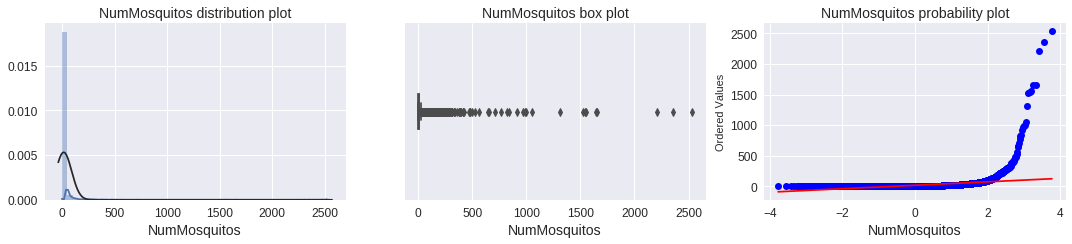

In [49]:
dist_plots(aggregated, ['NumMosquitos'])

In [50]:
# get number of unique traps sampled per day
year = aggregated.groupby(['Year','Date','Latitude','Longitude']).count()[['Species']]
year = year.reset_index()

# total number of unique traps sampled per day, by year
year.Year.value_counts().sort_index()

2007    1459
2009    1006
2011     988
2013    1163
Name: Year, dtype: int64

Sampling efforts varied between years, with 2007 having the most unique traps being sampled everyday, followed by 2013. This corresponds to the years that has the highest WNV present. This would be considered during the modeling process since sampling efforts would affect the detectability of WNV. The month of August shows a peak in WNV. 2007 shows horrible WNV present in certain areas

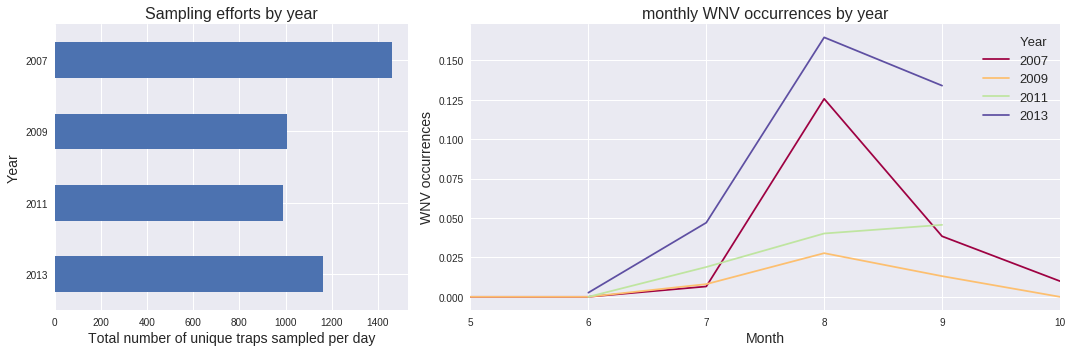

In [51]:
fig, ax = plt.subplots(ncols = 2, figsize=(15,5),  gridspec_kw={'width_ratios': [3, 5]})

# plot sampling efforts by year
year.Year.value_counts().sort_index(ascending=False).plot(kind = 'barh', ax = ax[0])
ax[0].set_title('Sampling efforts by year', fontsize=16)
ax[0].set_ylabel('Year',fontsize=14)
ax[0].set_xlabel('Total number of unique traps sampled per day',fontsize=14)

# plot WNV occurrence by month and year
wnv = aggregated[['Date','WnvPresent','Year','Month']]
sns.lineplot(x = wnv.Month,y = 'WnvPresent', data = wnv, hue = 'Year', ci = None, 
             legend = 'full', palette = 'Spectral', ax = ax[1])
ax[1].legend(fontsize = 13)
ax[1].set_title('monthly WNV occurrences by year', fontsize=16)
ax[1].set_xlabel('Month',fontsize=14)
ax[1].set_ylabel('WNV occurrences',fontsize=14)
ax[1].set_xlim(wnv.Month.min(), wnv.Month.max())
plt.tight_layout()